## Análise de Dados do Setor de Energia para Performance e Eficiência de Turbinas Eólicas

#### Importando Bibliotecas

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

#### Carregando a base

In [20]:
turbina = pd.read_csv('T1.csv')
display(turbina)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


### 1 - Lendo o arquivo

##### Fonte da base: https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset

In [23]:
import pandas as pd

# Supondo que 'turbina' é o seu DataFrame

# Renomear as colunas n(first)
turbina.columns = ['Data/hora', 'ActivePower(kW)', 'WindSpeed(m/s)', 'Curva_Teórica(KWh)', 'Direção do Vento(°)']

# Converter a coluna 'Data/hora' para o formato correto (second)
turbina['Data/hora'] = pd.to_datetime(turbina['Data/hora'], format='%d %m %Y %H:%M')

#Remover a coluna 'Direção do Vento(°)' (third)
turbina.drop(columns=['Direção do Vento(°)'], inplace=True)

# Exibir o DataFrame
display(turbina)


,Data/hora,ActivePower(kW),WindSpeed(m/s),Curva_Teórica(KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


### 2 - Plotando os dados - Real

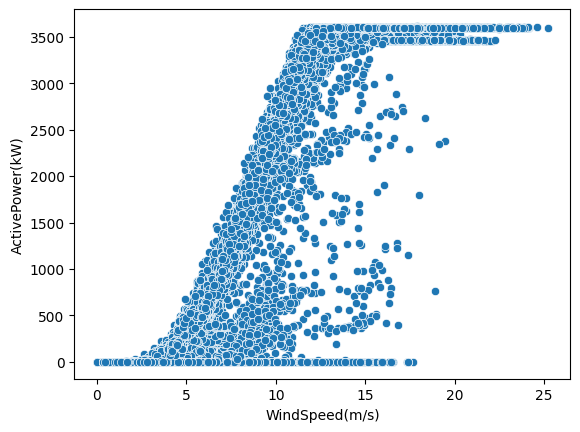

In [24]:
graf=sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)')

### 3 - Plotando os dados em um gráfico - Teórica

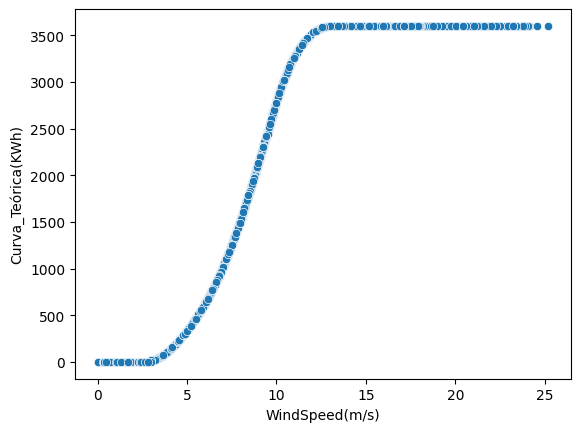

In [25]:
graf=sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='Curva_Teórica(KWh)')

### 4 - Criando limites

In [27]:
# Regra: Se a curva teórica for maior que a curva de erro, o valor de 'DentroLimite' deve ser 'Dentro', caso contraí vou assumir o limite de erro de 5% como aceito para cima ou para baixo em relação à curva teórica

#vel_vento = turbina['WindSpeed(m/s)'].tolist()
pot_real= turbina['ActivePower(kW)'].tolist()
pot_teorica = turbina['Curva_Teórica(KWh)'].tolist()
#print(pot_real[0:15])
pot_max = []
pot_min = []
dentro_limite = []

for potencia in pot_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)
#print(pot_max, pot_min)

for k, potencia in enumerate(pot_real):
    if potencia >= pot_min[k] and potencia <= pot_max[k]:
        dentro_limite.append('Dentro')
    elif potencia == 0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')
    

#print(len(pot_max),len(pot_min), len(pot_teorica))

print(dentro_limite.count('Dentro')/len(dentro_limite))



0.37286760340391845


### 5 - Adicionando lista "dentro_limite" ao dataframe:

In [31]:
turbina['DentroLimite'] = dentro_limite
# del turbina['DentroLimite']
display(turbina)

,Data/hora,ActivePower(kW),WindSpeed(m/s),Curva_Teórica(KWh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


### 6 - Plotando novamente os gráficos:

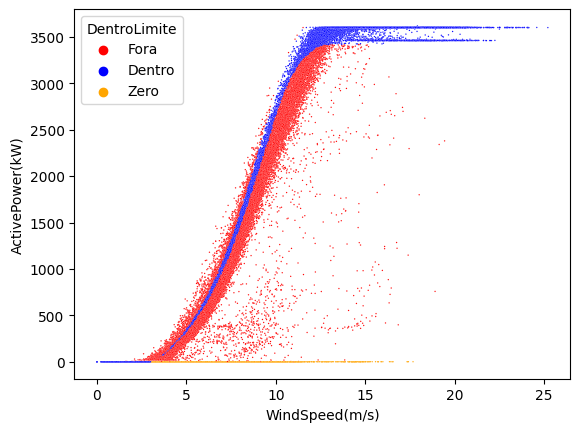

In [32]:
cores={'Dentro':'blue','Fora':'red','Zero':'orange'}
graf=sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)',hue='DentroLimite', s=1,palette=cores)

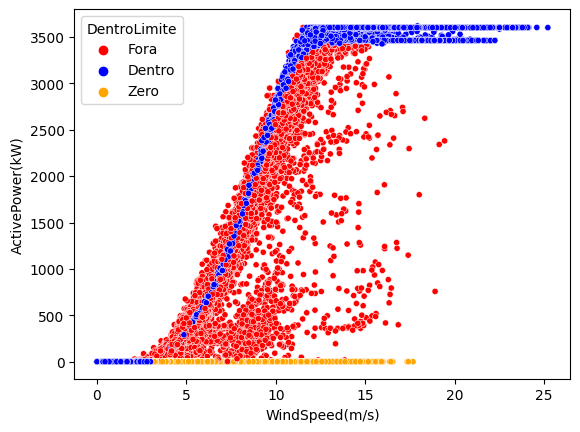

In [36]:
cores={'Dentro':'blue','Fora':'red','Zero':'orange'}
graf=sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)',hue='DentroLimite', s=20,palette=cores)


### 7 - Fazendo um Dashboard com os 3 gráficos principais, para análise

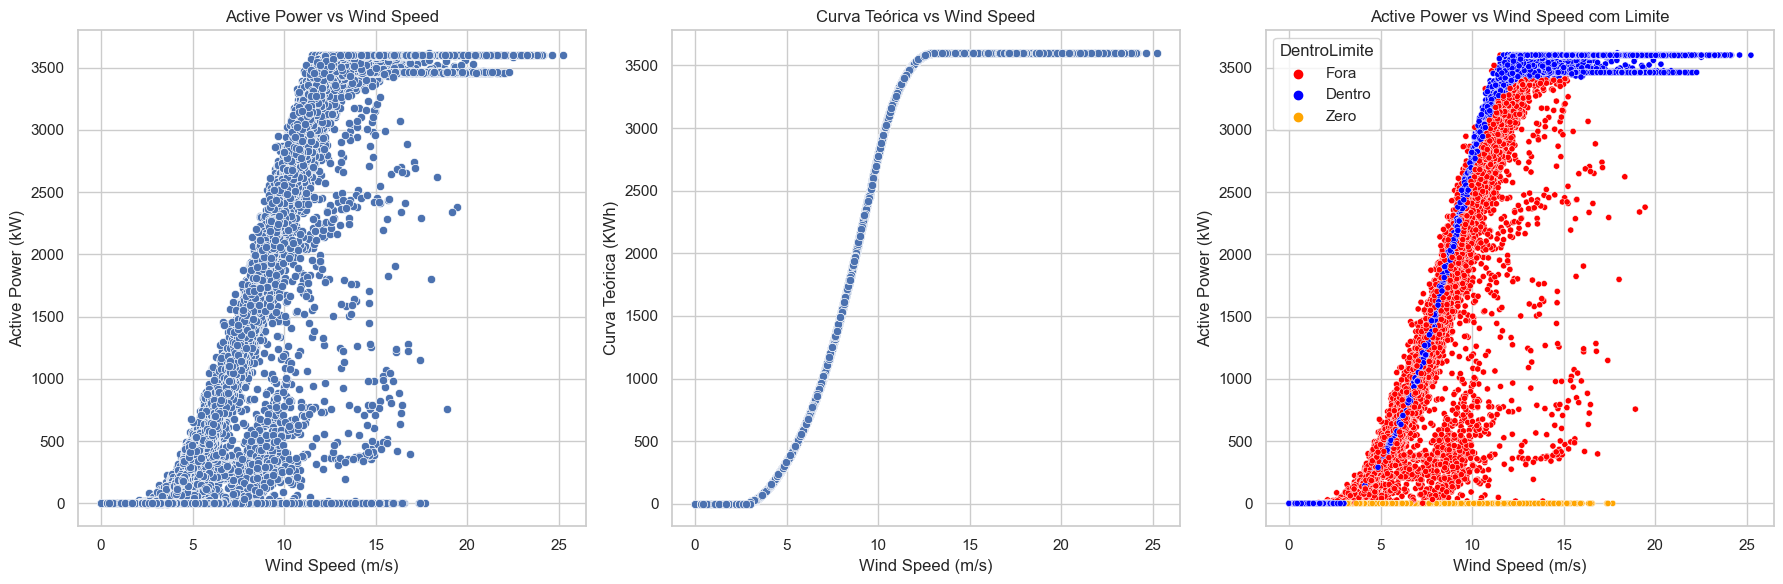

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações estilísticas do Seaborn (opcional)
sns.set(style="whitegrid")

# Cria uma figura e eixos (subplot) para os três gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: Scatterplot ActivePower vs WindSpeed
sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)', ax=axes[0])
axes[0].set_title('Active Power vs Wind Speed')
axes[0].set_xlabel('Wind Speed (m/s)')
axes[0].set_ylabel('Active Power (kW)')

# Gráfico 2: Scatterplot Curva_Teórica vs WindSpeed
sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='Curva_Teórica(KWh)', ax=axes[1])
axes[1].set_title('Curva Teórica vs Wind Speed')
axes[1].set_xlabel('Wind Speed (m/s)')
axes[1].set_ylabel('Curva Teórica (KWh)')

# Gráfico 3: Scatterplot ActivePower vs WindSpeed com cores personalizadas
cores = {'Dentro': 'blue', 'Fora': 'red', 'Zero': 'orange'}
sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='ActivePower(kW)', hue='DentroLimite', s=20, palette=cores, ax=axes[2])
axes[2].set_title('Active Power vs Wind Speed com Limite')
axes[2].set_xlabel('Wind Speed (m/s)')
axes[2].set_ylabel('Active Power (kW)')

# Ajusta o layout
plt.tight_layout()

# Exibe o dashboard de gráficos
plt.show()
